In [4]:
import pandas as pd
import numpy as np
import seaborn as sns

In [43]:
beml_df = pd.read_csv("F:\\Data Science\\Normal Distribution\\BEML.csv")
beml_df.head()
#beml_df[0:5]    # another way to view top rows

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1121.0,1151.00,1121.00,1134.0,1135.60,101651.0,1157.18
1,2010-01-05,1146.8,1149.00,1128.75,1135.0,1134.60,59504.0,676.47
2,2010-01-06,1140.0,1164.25,1130.05,1137.0,1139.60,128908.0,1482.84
3,2010-01-07,1142.0,1159.40,1119.20,1141.0,1144.15,117871.0,1352.98
4,2010-01-08,1156.0,1172.00,1140.00,1141.2,1144.05,170063.0,1971.42


In [44]:
glaxo_df = pd.read_csv("F:\\Data Science\\Normal Distribution\\GLAXO.csv")
glaxo_df[0:5]

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1613.00,1629.10,1602.00,1629.0,1625.65,9365.0,151.74
1,2010-01-05,1639.95,1639.95,1611.05,1620.0,1616.80,38148.0,622.58
2,2010-01-06,1618.00,1644.00,1617.00,1639.0,1638.50,36519.0,595.09
3,2010-01-07,1645.00,1654.00,1636.00,1648.0,1648.70,12809.0,211.00
4,2010-01-08,1650.00,1650.00,1626.55,1640.0,1639.80,28035.0,459.11


In [45]:
beml_df['Date']    #SERIES/ARRAY VIEW

0       2010-01-04
1       2010-01-05
2       2010-01-06
3       2010-01-07
4       2010-01-08
           ...    
1734    2016-12-26
1735    2016-12-27
1736    2016-12-28
1737    2016-12-29
1738    2016-12-30
Name: Date, Length: 1739, dtype: object

In [46]:
beml_df = beml_df[['Date', 'Close']]
glaxo_df = glaxo_df[['Date', 'Close']]

In [47]:
beml_df

,Date,Close
0,2010-01-04,1135.60
1,2010-01-05,1134.60
2,2010-01-06,1139.60
3,2010-01-07,1144.15
4,2010-01-08,1144.05
...,...,...
1734,2016-12-26,950.25
1735,2016-12-27,975.70
1736,2016-12-28,974.40
1737,2016-12-29,986.05


In [39]:
'''The DataFrames have a date column, so we can
create a DatetimeIndex index from this column Date. It will ensure that the rows are sorted by time in
ascending order.'''

'The DataFrames have a date column, so we can\ncreate a DatetimeIndex index from this column Date. It will ensure that the rows are sorted by time in\nascending order.'

In [58]:
glaxo_df = glaxo_df.set_index(pd.DatetimeIndex(glaxo_df['Date']))   #INDEX AND COL 'Date' #Datatype of Date object to datetime 
beml_df = beml_df.set_index(pd.DatetimeIndex(beml_df['Date']))

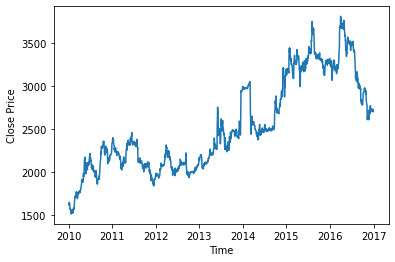

In [59]:
import matplotlib.pyplot as plt
import seaborn as sn  
%matplotlib inline

#plot Glaxo   Glaxo is low risk 
plt.plot(glaxo_df.Close);
plt.xlabel('Time');
plt.ylabel('Close Price');

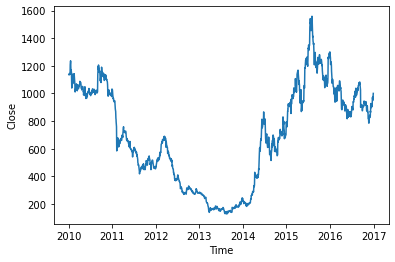

In [60]:
#plot BEML     BEML is high risk
plt.plot(beml_df.Close);
plt.xlabel('Time');
plt.ylabel('Close');

In [61]:
glaxo_df['gain'] = glaxo_df.Close.pct_change(periods = 1)    #period= to get each  day/each month; '1' indicate each day
beml_df['gain'] = beml_df.Close.pct_change(periods = 1)

In [64]:
beml_df['gain']   #gain of BEML 

Date
2010-01-05   -0.000881
2010-01-06    0.004407
2010-01-07    0.003993
2010-01-08   -0.000087
2010-01-11   -0.006162
                ...   
2016-12-26   -0.021924
2016-12-27    0.026782
2016-12-28   -0.001332
2016-12-29    0.011956
2016-12-30    0.014756
Name: gain, Length: 1738, dtype: float64

In [65]:
#drop first row since it is NaN
glaxo_df = glaxo_df.dropna()    
beml_df = beml_df.dropna()

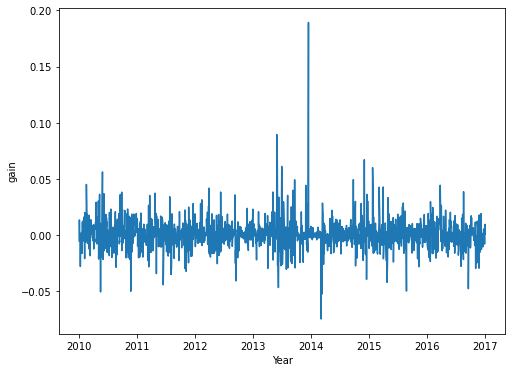

In [66]:
#Plot the gains
plt.figure(figsize = (8, 6));
plt.plot(glaxo_df.index, glaxo_df.gain);
plt.xlabel('Year');
plt.ylabel('gain');

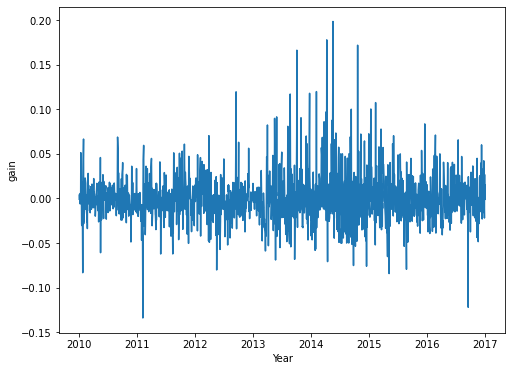

In [67]:
#Plot the gains   BEML has high variance
plt.figure(figsize = (8, 6));
plt.plot(beml_df.index,beml_df.gain);
plt.xlabel('Year');
plt.ylabel('Gain');

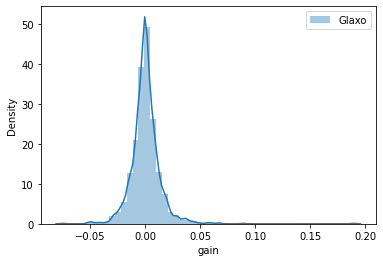

In [16]:
# Seaborn used for histo plot
sn.distplot(glaxo_df.gain, label = 'Glaxo');
plt.xlabel('Gain');
plt.ylabel('Density');
plt.legend();

In [5]:
sns.distplot(beml_df.gain, label = 'BEML');
plt.xlabel('gain');
#plt.ylabel('Density');
plt.legend();

NameError: name 'beml_df' is not defined

## Mean and std shows stocks are close in gain and loss 

In [68]:
print('Mean:', round(glaxo_df.gain.mean(), 4))
print('Standard Deviation: ', round(glaxo_df.gain.std(), 4))

Mean: 0.0004
Standard Deviation:  0.0134


In [69]:
print('Mean: ', round(beml_df.gain.mean(), 4))
print('Standard Deviation: ', round(beml_df.gain.std(), 4))

Mean:  0.0003
Standard Deviation:  0.0264


In [70]:
from scipy import stats
#Probability of making 2% loss or higher in Glaxo
stats.norm.cdf( -0.02,
loc=glaxo_df.gain.mean(),
scale=glaxo_df.gain.std())

0.06352488667177397

In [71]:
#Probability of making 2% gain or higher in Glaxo
#positive probability is subtracted from '1' since we calculating profit
1 - stats.norm.cdf(0.02,
loc= glaxo_df.gain.mean(),
scale= glaxo_df.gain.std())

0.07104511457618568

### Inclass Exercise

### Compute 2% loss or gain for BEML

In [72]:
#Probability of making 2% loss or higher in BEML
stats.norm.cdf( -0.02,
loc=beml_df.gain.mean(),
scale=beml_df.gain.std())

0.22155987503755292

In [73]:
#Probability of making 2% gain or higher in BEML
#positive probability is subtracted from '1' since we calculating profit
1 - stats.norm.cdf(0.02,
loc= beml_df.gain.mean(),
scale= beml_df.gain.std())

0.22769829484075343

In [36]:
#Probability of making 2% gain or higher in BEML
1 - stats.norm.cdf(0.02,
loc=beml_df.gain.mean(),
scale=beml_df.gain.std())

0.22769829484075343